In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random as rd
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from sklearn.svm import LinearSVC
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("Balanced_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2500 non-null   int64  
 1   X                      2500 non-null   int64  
 2   Artist.Reputation      2500 non-null   float64
 3   Height                 2500 non-null   int64  
 4   Width                  2500 non-null   int64  
 5   Weight                 2500 non-null   float64
 6   Material               2500 non-null   object 
 7   Price.Of.Sculpture     2500 non-null   float64
 8   Base.Shipping.Price    2500 non-null   float64
 9   International          2500 non-null   object 
 10  Express.Shipment       2500 non-null   object 
 11  Installation.Included  2500 non-null   object 
 12  Transport              2500 non-null   object 
 13  Fragile                2500 non-null   object 
 14  Customer.Information   2500 non-null   object 
 15  Remo

In [4]:
df = df.drop(['Unnamed: 0', 'X', 'Material','International','Express.Shipment','Installation.Included','Transport','Fragile','Customer.Information','Remote.Location','scheduled_year','scheduled_month','scheduled_day','scheduled_dateofmonth','delivery_year','delivery_month','delivery_day','delivery_dateofmonth','delta','state','Cost'], axis=1)

In [5]:
df.head()

,Artist.Reputation,Height,Width,Weight,Price.Of.Sculpture,Base.Shipping.Price,Cost_Numeric
0,0.07,18,13,1475.0,6.10,14.63,166.25
1,0.34,12,6,133.0,5.99,19.62,189.05
2,0.38,3,2,13.0,6.72,23.81,199.60
3,0.03,14,8,1108.0,5.47,12.99,148.25
4,0.47,13,7,664.0,4.97,13.74,165.32


In [6]:
df['Cost_Numeric'].describe()

count    2.500000e+03
mean     1.791253e+04
std      1.337769e+05
min      8.756000e+01
25%      2.264975e+02
50%      4.874300e+02
75%      1.738545e+03
max      3.117107e+06
Name: Cost_Numeric, dtype: float64

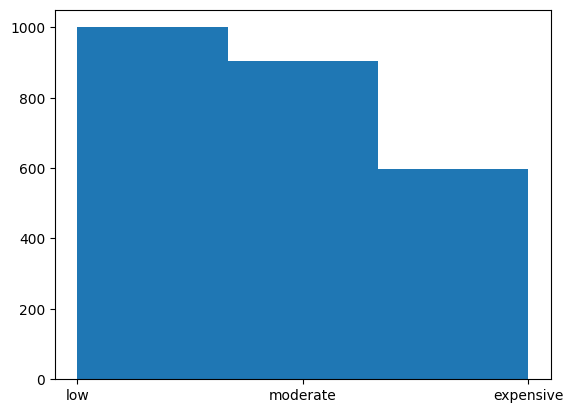

In [7]:
labels = ['low', 'moderate', 'expensive']
bins = [ 0, 350, 2000, 4000000 ]
df['Cost_Labels'] = pd.cut(df['Cost_Numeric'] , bins=bins, labels=labels, include_lowest=True)
plt.hist(df['Cost_Labels'], bins=3)
plt.show()

In [8]:
# Filter the dataset to select only rows where Cost_Label is "low"
low_cost_data = df[df["Cost_Labels"] == "low"]

# Sample 500 rows from the filtered dataset
low_cost_sampled_data = low_cost_data.sample(n=500, random_state=42)

In [9]:
# Filter the dataset to select only rows where Cost_Label is "moderate"
moderate_cost_data = df[df["Cost_Labels"] == "moderate"]

# Sample 500 rows from the filtered dataset
moderate_cost_sampled_data = moderate_cost_data.sample(n=500, random_state=42)

In [10]:
# Filter the dataset to select only rows where Cost_Label is "expensive"
expensive_cost_data = df[df["Cost_Labels"] == "expensive"]

# Sample 500 rows from the filtered dataset
expensive_cost_sampled_data = expensive_cost_data.sample(n=500, random_state=42)

In [11]:
# Concatenate the datasets along rows
merged_df = pd.concat([low_cost_sampled_data, moderate_cost_sampled_data, expensive_cost_sampled_data], ignore_index=True)

# Print the first few rows of the merged dataset
print(merged_df.head())

   Artist.Reputation  Height  Width  Weight  Price.Of.Sculpture  \
0               0.45      18      6   188.0                5.19   
1               0.38      23      8   734.0                6.18   
2               0.08       8      5  3543.0                8.46   
3               0.88       6      5  3232.0               11.62   
4               0.42       8      8   259.0                6.53   

   Base.Shipping.Price  Cost_Numeric Cost_Labels  
0                21.53        255.78         low  
1                19.38        304.44         low  
2                19.09        227.89         low  
3                12.90        322.88         low  
4                12.73        155.78         low  


In [12]:
merged_df.corr()

,Artist.Reputation,Height,Width,Weight,Price.Of.Sculpture,Base.Shipping.Price,Cost_Numeric
Artist.Reputation,1.000000,0.041434,0.024916,0.023218,0.058055,0.049343,0.104543
Height,0.041434,1.000000,0.705683,0.231452,0.211734,0.360541,0.212946
Width,0.024916,0.705683,1.000000,0.345833,0.328477,0.321710,0.214103
Weight,0.023218,0.231452,0.345833,1.000000,0.937405,0.109769,0.588280
Price.Of.Sculpture,0.058055,0.211734,0.328477,0.937405,1.000000,0.109277,0.653130
Base.Shipping.Price,0.049343,0.360541,0.321710,0.109769,0.109277,1.000000,0.080740
Cost_Numeric,0.104543,0.212946,0.214103,0.588280,0.653130,0.080740,1.000000


In [13]:
class_names=merged_df['Cost_Labels'].unique().astype(str)

In [14]:
merged_df = merged_df.drop(['Height', 'Cost_Numeric', 'Base.Shipping.Price'],axis = 1)

In [15]:
merged_df.to_csv("Data_For_SVM.csv")

In [16]:
y = merged_df["Cost_Labels"]
X = merged_df.drop(['Cost_Labels'],axis = 1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### SVM with default Kernel = 'rbf'

In [18]:
svm = SVC()

# Train the model on the training data
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_SVM = svm.predict(X_test)

# Print Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_SVM)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred_SVM)

print(accuracy)

0.69


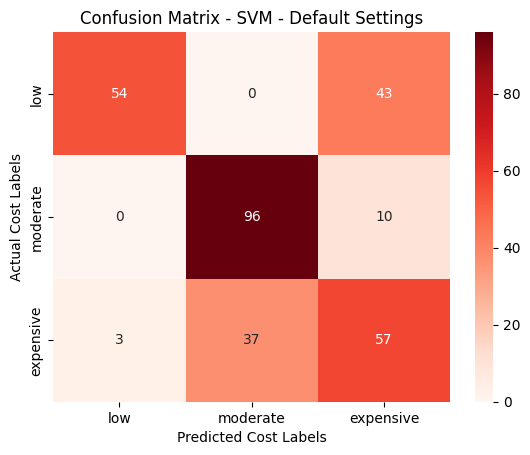

In [19]:
sns.heatmap(cm_svm, annot=True, cmap="Reds", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - SVM - Default Settings")
plt.xlabel("Predicted Cost Labels")
plt.ylabel("Actual Cost Labels")
plt.show()

#### Now let's update the Cost Value

In [20]:
svm_c = SVC(C=10)

# Train the model on the training data
svm_c.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_SVM_C = svm_c.predict(X_test)

# Print Confusion Matrix
cm_svm_c = confusion_matrix(y_test, y_pred_SVM_C)

# Calculate the accuracy of the predictions
accuracy_c = accuracy_score(y_test, y_pred_SVM_C)

print(accuracy_c)

0.6066666666666667


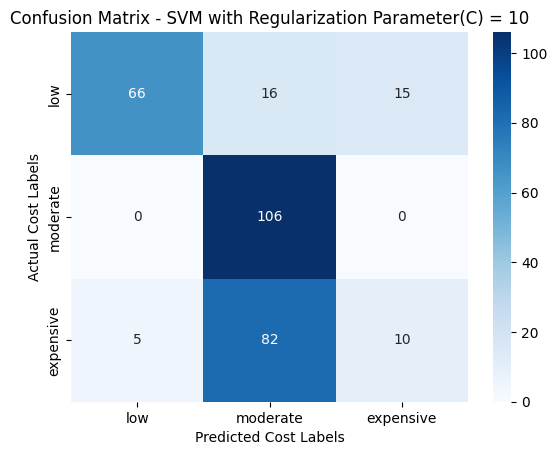

In [21]:
sns.heatmap(cm_svm_c, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - SVM with Regularization Parameter(C) = 10")
plt.xlabel("Predicted Cost Labels")
plt.ylabel("Actual Cost Labels")
plt.show()

In [22]:
svm_c_u = SVC(C=100)

# Train the model on the training data
svm_c_u.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_SVM_C_U = svm_c_u.predict(X_test)

# Print Confusion Matrix
cm_svm_c_u = confusion_matrix(y_test, y_pred_SVM_C_U)

# Calculate the accuracy of the predictions
accuracy_c_u = accuracy_score(y_test, y_pred_SVM_C_U)

print(accuracy_c_u)

0.6633333333333333


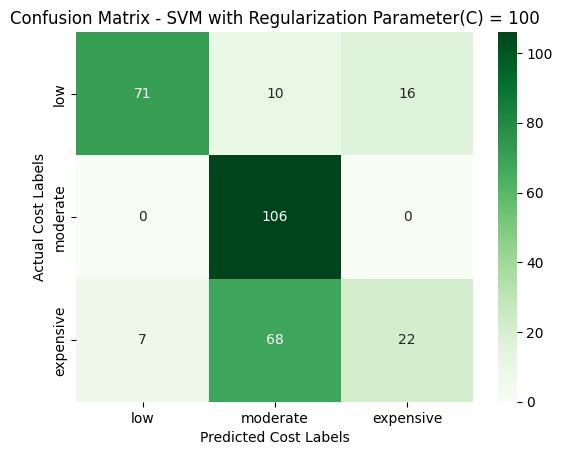

In [23]:
sns.heatmap(cm_svm_c_u, annot=True, cmap="Greens", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - SVM with Regularization Parameter(C) = 100")
plt.xlabel("Predicted Cost Labels")
plt.ylabel("Actual Cost Labels")
plt.show()

#### SVM with Polynomial Kernel

In [24]:
svm_poly = SVC(kernel='poly', C = 1)

# Train the model on the training data
svm_poly.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_SVM_Poly = svm_poly.predict(X_test)

# Print Confusion Matrix
cm_svm_poly = confusion_matrix(y_test, y_pred_SVM_Poly)

# Calculate the accuracy of the predictions
accuracy_poly = accuracy_score(y_test, y_pred_SVM_Poly)

print(accuracy_poly)

0.41


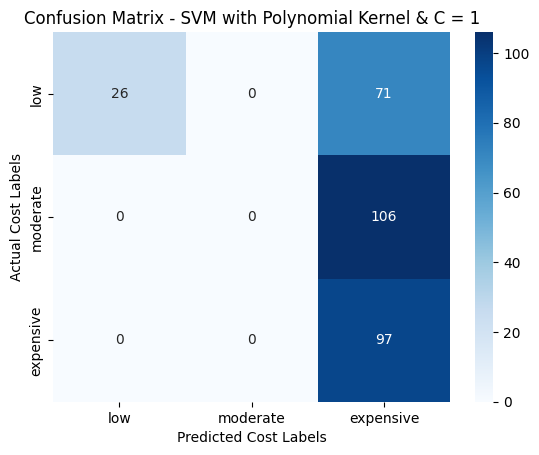

In [25]:
sns.heatmap(cm_svm_poly, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - SVM with Polynomial Kernel & C = 1")
plt.xlabel("Predicted Cost Labels")
plt.ylabel("Actual Cost Labels")
plt.show()

In [26]:
svm_poly_1 = SVC(kernel='poly', C = 10)

# Train the model on the training data
svm_poly_1.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_SVM_Poly_1 = svm_poly_1.predict(X_test)

# Print Confusion Matrix
cm_svm_poly_1 = confusion_matrix(y_test, y_pred_SVM_Poly_1)

# Calculate the accuracy of the predictions
accuracy_poly_1 = accuracy_score(y_test, y_pred_SVM_Poly_1)

print(accuracy_poly_1)

0.4266666666666667


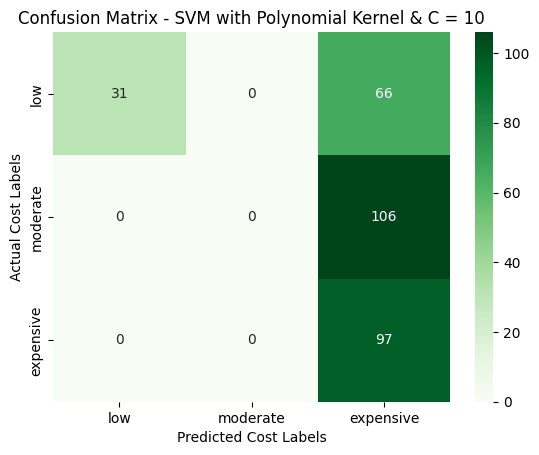

In [27]:
sns.heatmap(cm_svm_poly_1, annot=True, cmap="Greens", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - SVM with Polynomial Kernel & C = 10")
plt.xlabel("Predicted Cost Labels")
plt.ylabel("Actual Cost Labels")
plt.show()

In [28]:
svm_poly_2 = SVC(kernel='poly', C = 100)

# Train the model on the training data
svm_poly_2.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_SVM_Poly_2 = svm_poly_2.predict(X_test)

# Print Confusion Matrix
cm_svm_poly_2 = confusion_matrix(y_test, y_pred_SVM_Poly_2)

# Calculate the accuracy of the predictions
accuracy_poly_2 = accuracy_score(y_test, y_pred_SVM_Poly_2)

print(accuracy_poly_2)

0.4533333333333333


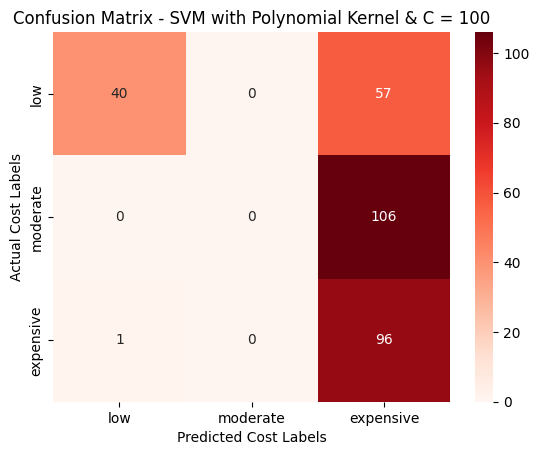

In [29]:
sns.heatmap(cm_svm_poly_2, annot=True, cmap="Reds", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - SVM with Polynomial Kernel & C = 100")
plt.xlabel("Predicted Cost Labels")
plt.ylabel("Actual Cost Labels")
plt.show()

#### SVM with Sigmoid Kernel

In [30]:
svm_sigmoid = SVC(kernel="sigmoid", C = 1)

# Train the model on the training data
svm_sigmoid.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_SVM_Sigmoid = svm_sigmoid.predict(X_test)

# Print Confusion Matrix
cm_svm_sigmoid = confusion_matrix(y_test, y_pred_SVM_Sigmoid)

# Calculate the accuracy of the predictions
accuracy_sigmoid = accuracy_score(y_test, y_pred_SVM_Sigmoid)

print(accuracy_sigmoid)

0.5333333333333333


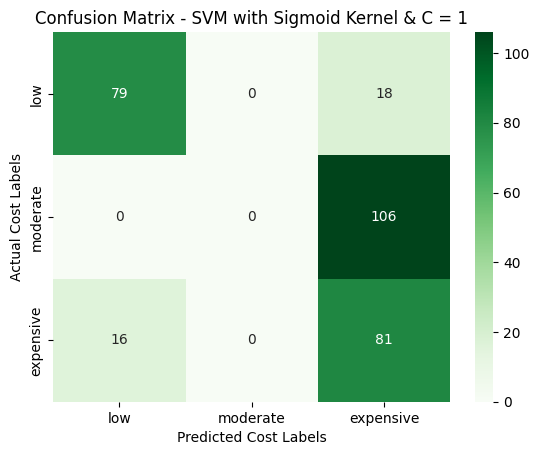

In [31]:
sns.heatmap(cm_svm_sigmoid, annot=True, cmap="Greens", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - SVM with Sigmoid Kernel & C = 1")
plt.xlabel("Predicted Cost Labels")
plt.ylabel("Actual Cost Labels")
plt.show()

In [32]:
svm_sigmoid_1 = SVC(kernel="sigmoid", C = 10)

# Train the model on the training data
svm_sigmoid_1.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_SVM_Sigmoid_1 = svm_sigmoid_1.predict(X_test)

# Print Confusion Matrix
cm_svm_sigmoid_1 = confusion_matrix(y_test, y_pred_SVM_Sigmoid_1)

# Calculate the accuracy of the predictions
accuracy_sigmoid_1 = accuracy_score(y_test, y_pred_SVM_Sigmoid_1)

print(accuracy_sigmoid_1)

0.5966666666666667


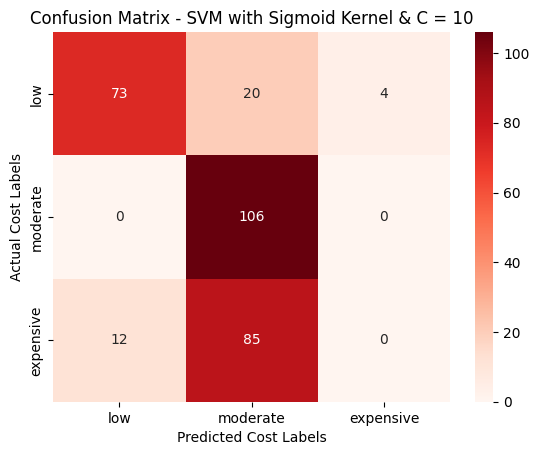

In [33]:
sns.heatmap(cm_svm_sigmoid_1, annot=True, cmap="Reds", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - SVM with Sigmoid Kernel & C = 10")
plt.xlabel("Predicted Cost Labels")
plt.ylabel("Actual Cost Labels")
plt.show()

In [34]:
svm_sigmoid_2 = SVC(kernel="sigmoid", C = 100)

# Train the model on the training data
svm_sigmoid_2.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_SVM_Sigmoid_2 = svm_sigmoid_1.predict(X_test)

# Print Confusion Matrix
cm_svm_sigmoid_2 = confusion_matrix(y_test, y_pred_SVM_Sigmoid_2)

# Calculate the accuracy of the predictions
accuracy_sigmoid_2 = accuracy_score(y_test, y_pred_SVM_Sigmoid_2)

print(accuracy_sigmoid_2)

0.5966666666666667


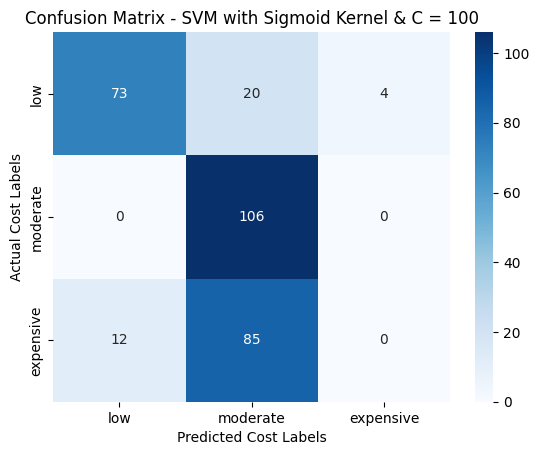

In [35]:
sns.heatmap(cm_svm_sigmoid_2, annot=True, cmap="Blues", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - SVM with Sigmoid Kernel & C = 100")
plt.xlabel("Predicted Cost Labels")
plt.ylabel("Actual Cost Labels")
plt.show()

#### SVC with parameter kernel=’linear' 

In [36]:
svm_lin = LinearSVC(random_state=0, tol=1e-05, C = 2)

# Train the model on the training data
svm_lin.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_linear = svm_lin.predict(X_test)

# Print Confusion Matrix
cm_svm_linear = confusion_matrix(y_test, y_pred_linear)

# Calculate the accuracy of the predictions
accuracy_linear = accuracy_score(y_test, y_pred_linear)

print(accuracy_linear)

0.7366666666666667


/Users/mahendra_g_p/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


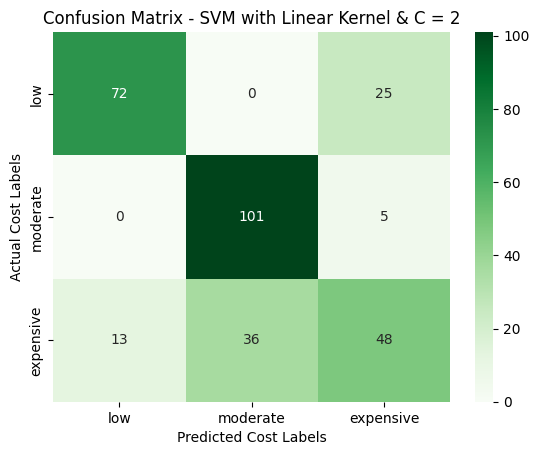

In [37]:
sns.heatmap(cm_svm_linear, annot=True, cmap="Greens", fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - SVM with Linear Kernel & C = 2")
plt.xlabel("Predicted Cost Labels")
plt.ylabel("Actual Cost Labels")
plt.show()